## Project on Ensemble Techniques

                                                         

### About dataset:

The data is related with direct marketing campaigns of a
Portuguese banking institution. The marketing campaigns
were based on phone calls. Often, more than one contact to
the same client was required, in order to access if the product
(bank term deposit) would be ('yes') or not ('no') subscribed.


### Domain 
Banking

### Context:
Leveraging customer information is paramount for most
businesses. In the case of a bank, attributes of customers like
the ones mentioned below can be crucial in strategizing a
marketing campaign when launching a new product.

### Objective:
The classification goal is to predict if the client will subscribe
(yes/no) a term deposit (variable y).

### Learning Outcomes:

* Exploratory Data Analysis

* Preparing the data to train a model

* Training and making predictions using an Ensemble
  Model

* Tuning an Ensemble model

### Import  all neccessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix,precision_score,classification_report,f1_score,roc_curve,roc_auc_score,auc,accuracy_score
from sklearn import metrics
import pylab as pl
%matplotlib inline
import warnings 
warnings.simplefilter("ignore")

#### Load dataset

In [2]:
df =pd.read_csv("bank-full.csv")

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
# Data types of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


From the above output we can see the datatypes of the different attributes.
It contains 7 integer type and 10 object type attribute.

In [5]:
# Shape of the data
df.shape

(45211, 17)

In [6]:
#Checking the presence of missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

There are no missing values in the dataset

In [7]:
#5 point summary of numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [8]:
#Checking the presence of outliers
# Outlier is defined as Data points above or below than 1.5 times the Inter Quartile Range of the data.
numerical = ['age','balance','day','duration','campaign','pdays','previous']
Q1 = df[numerical].quantile(0.25)
Q3 = df[numerical].quantile(0.75)
IQR = Q3 - Q1
out = (df[numerical] < (Q1 - 1.5 * IQR)) | (df[numerical] > (Q3 + 1.5 * IQR))
out.sum()

age          487
balance     4729
day            0
duration    3235
campaign    3064
pdays       8257
previous    8257
dtype: int64

There are 6 columns in the dataset which has outliers

In [9]:
#finding unique data
df.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

#### Data Distribution of features

Distribution of some of the categorical features

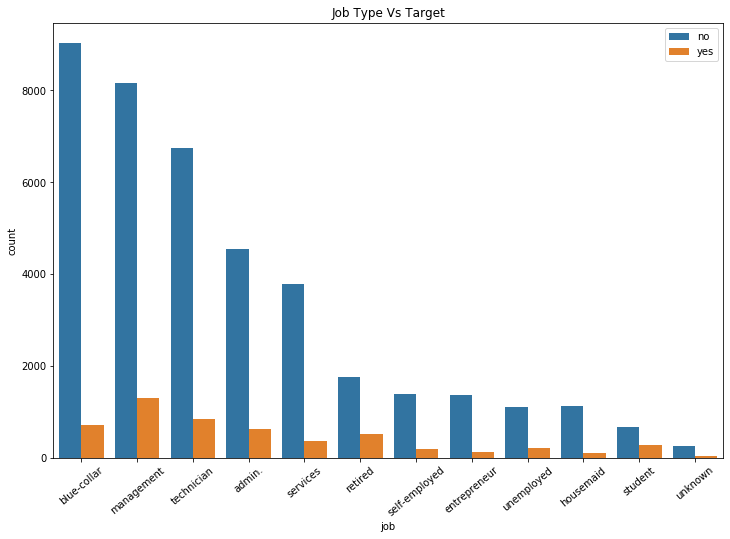

In [10]:
fig,ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(df['job'],hue=df['Target'],order=df['job'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set_title("Job Type Vs Target")
plt.legend()
plt.show()


Most of the persons belong to the Blue-collar job type .
However more numnber of  persons belonging to management jobs has subscribe to the term deposit.
There is also an unknown category in the job type which needs to be replaced.

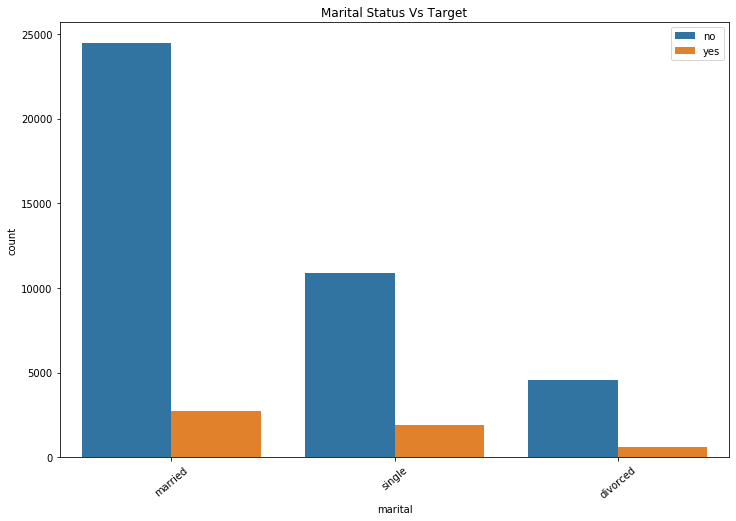

In [11]:
fig,axes = plt.subplots(figsize=(12,8))
ax=sns.countplot(df['marital'],hue=df['Target'],order=df['marital'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set_title("Marital Status Vs Target")
plt.legend()
plt.show()


More than half of the customers are married. Less no of divorced customers has said yes for term deposit.

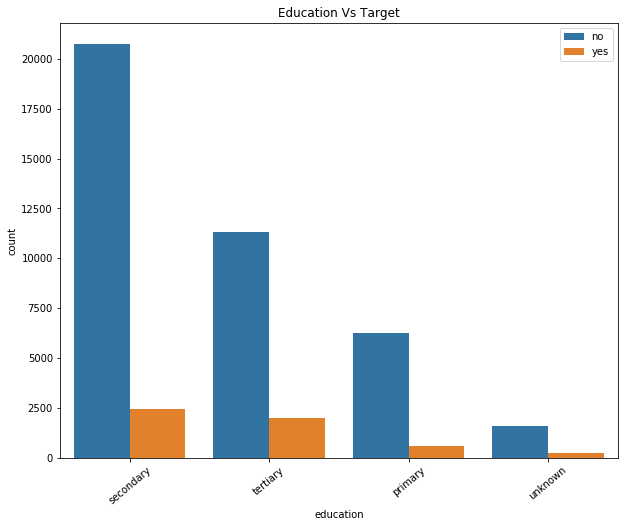

In [12]:
fig,axes = plt.subplots(figsize=(10,8))
ax=sns.countplot(df['education'],hue=df['Target'],order=df['education'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set_title("Education Vs Target")
plt.legend()
plt.show()


Most of the contacted List of Customer have secondary level of education.

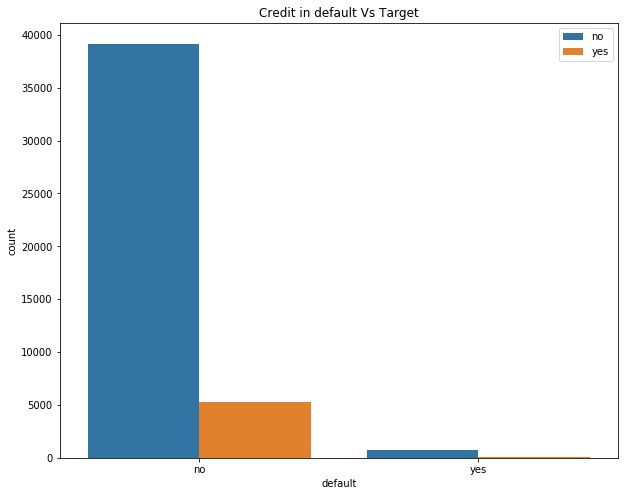

In [13]:
fig,axes = plt.subplots(figsize=(10,8))
ax=sns.countplot(df['default'],hue=df['Target'],order=df['default'].value_counts().index)
ax.set_title("Credit in default Vs Target")
plt.legend()
plt.show()


Majority of the customer have credit in default.

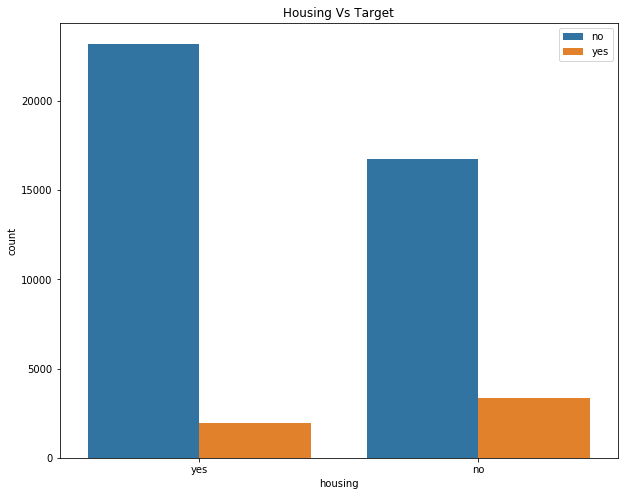

In [14]:
fig,axes = plt.subplots(figsize=(10,8))
ax=sns.countplot(df['housing'],hue=df['Target'],order=df['housing'].value_counts().index)
ax.set_title("Housing Vs Target")
plt.legend()
plt.show()


There are more number of customers who has housing loan, however customers that dont have housing loan has more number in saying yes for term deposit.

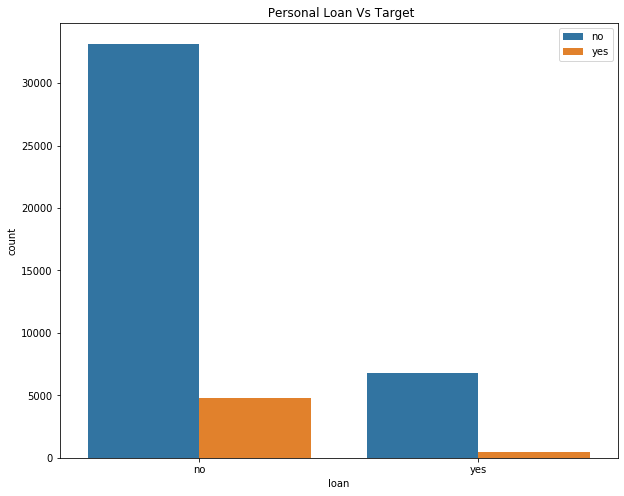

In [15]:
fig,axes = plt.subplots(figsize=(10,8))
ax=sns.countplot(df['loan'],hue=df['Target'],order=df['loan'].value_counts().index)
ax.set_title(" Personal Loan Vs Target")
plt.legend()
plt.show()


Majority of the customers has personal loan

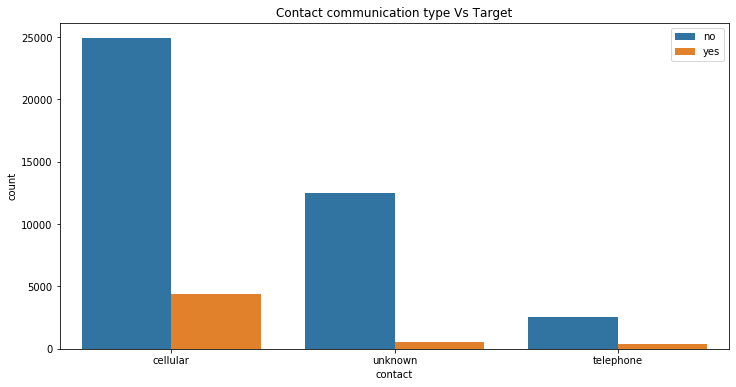

In [16]:
fig,axes = plt.subplots(figsize=(12,6))
ax=sns.countplot(df['contact'],hue=df['Target'],order=df['contact'].value_counts().index)
ax.set_title("Contact communication type Vs Target")
plt.legend()
plt.show()

Most of the customers has been contacted via cellular communication type. There are many unknown communication type in the dataset.However the type of communication does not effect the target variable.

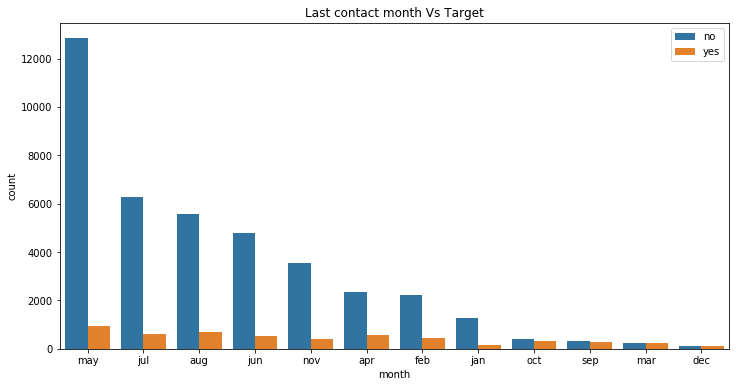

In [17]:
fig,axes = plt.subplots(figsize=(12,6))
ax=sns.countplot(df['month'],hue=df['Target'],order=df['month'].value_counts().index)
ax.set_title("Last contact month Vs Target")
plt.legend()
plt.show()

Most of the customers has been contacted in the month of may.

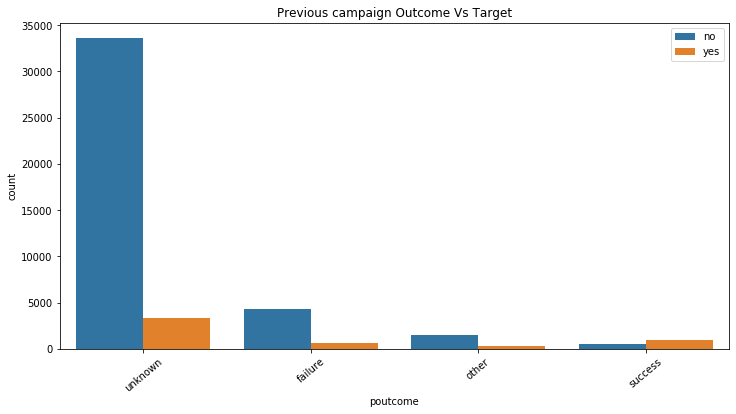

In [18]:
fig,axes = plt.subplots(figsize=(12,6))
ax=sns.countplot(df['poutcome'],hue=df['Target'],order=df['poutcome'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set_title("Previous campaign Outcome Vs Target")
plt.legend()
plt.show()

More than 75% of the values in the column are unknown and we cannot drop those values as there will be huge data loss.
It is also observed from the graph that customers who are successfully enrolled from the previous campaign are more likely to say yes for this current campaign also.

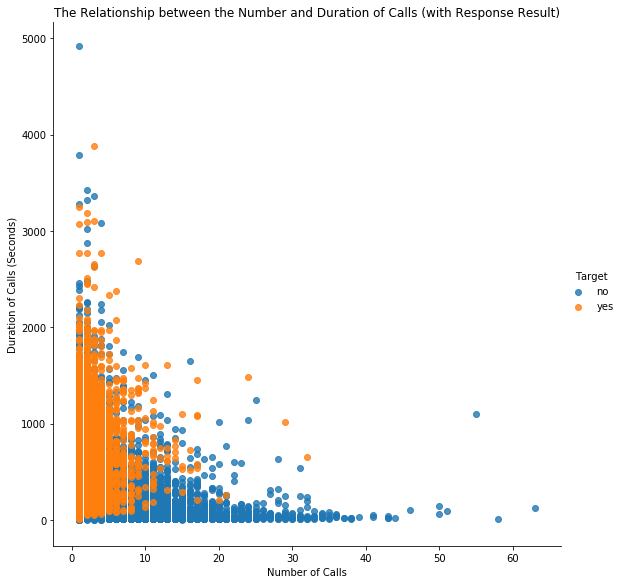

In [19]:
sns.lmplot(x='campaign', y='duration', data=df, fit_reg=False, hue='Target',height=8)
plt.xlabel('Number of Calls')
plt.ylabel('Duration of Calls (Seconds)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')
plt.show()

It is observed from the graph that as the call duration increases there is increment in number of saying yes.
However if the number of calls increases it is more likely that the customers will say no.

Distribution of numerical features


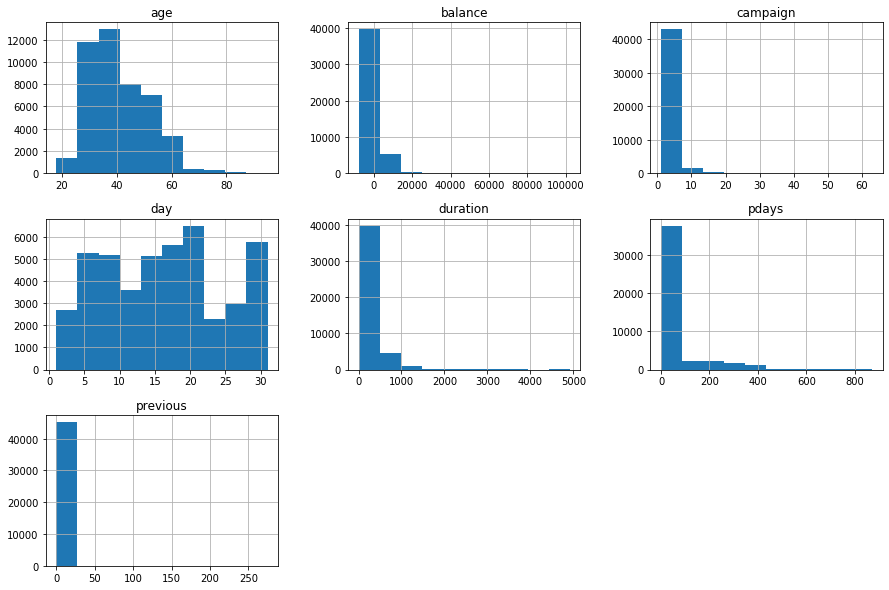

In [20]:
df[numerical].hist(figsize=(15,10))
plt.show()

* Age - From the graph it is observed that the Age column has slight right skewed distribution.
* Balance - The distribution is highly right skewed and most of the customers have balance less than 5000 euros
* Campaign - The distribution is highly right skewed.
* Day - The distribution shows that most of the customers contact in the mid on the month.
* Duration - The distribution is highly right skewed.
* pdays - It is observed that less number of customers have been contacted by the bank.Distribution is hoghly skewed.



#### Distribution of Target Column

In [21]:
df.groupby("Target").agg({'Target': 'count'})

,Target
Target,
no,39922
yes,5289


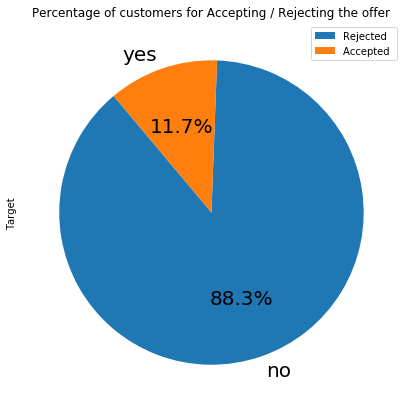

In [22]:
fig,axes = plt.subplots(figsize=(8,7) )
df['Target'].value_counts(sort=True).plot(kind='pie',autopct='%1.1f%%', fontsize= 20,startangle=130)
plt.legend(['Rejected ','Accepted '])
plt.title('Percentage of customers for Accepting / Rejecting the offer')
plt.show()

From the graph it is observed that dataset is highly baised.Only 11.7% customers had accepted the loan.

##### Corelation between columns

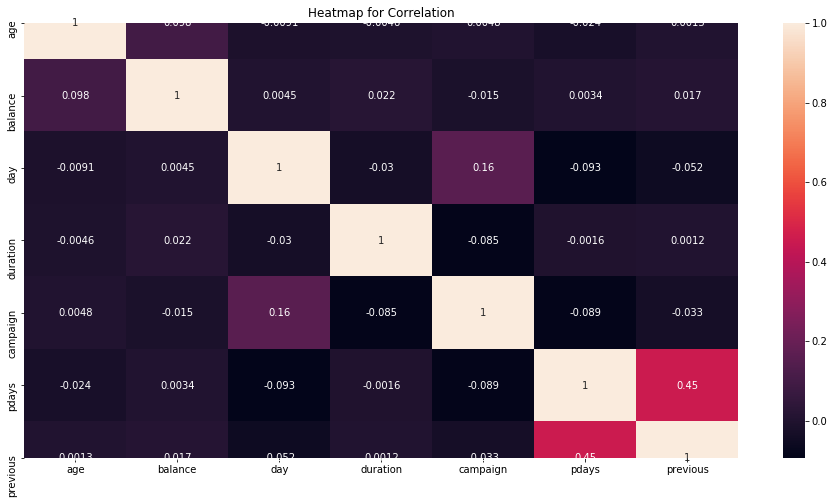

In [23]:
# Plot for Visualising the correlation between variables and Target Column.

fig,ax = plt.subplots( figsize=(16,8) )
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap for Correlation')
plt.show()

### Preparation of data 

#### Get rid of missing or unknown values

In [24]:
print("List of unique values in poutcome \n", df['poutcome'].value_counts())
print("\nList of unique values in education \n", df['education'].value_counts())
print("\nList of unique values in job \n", df['job'].value_counts())

List of unique values in poutcome 
 unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

List of unique values in education 
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

List of unique values in job 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


There are 36959 unknown values in poutcome column which is 81.74% of the total.If we drop the values there will be significant loss in data.Hence we keep the data and assumed that unknown is a category for the particular feature.
There are 1840 other values which we can replace to unknown type.

In [25]:
df['poutcome'].replace('other','unknown',inplace=True)
print(df['poutcome'].unique())

['unknown' 'failure' 'success']


There are 1857 unknown values in Job column and 288 unknown values in education column,which is around 4% and 0.6% of the data.
Hence we can drop those values.

In [26]:
df.drop(df[df['job']=='unknown'].index,inplace=True,axis=0)
df.drop(df[df['education']=='unknown'].index,inplace=True,axis=0)
print("Unique values in job",df['job'].unique())
print("Unique values in eduaction ",df['education'].unique())

Unique values in job ['management' 'technician' 'entrepreneur' 'retired' 'admin.' 'services'
 'blue-collar' 'self-employed' 'unemployed' 'housemaid' 'student']
Unique values in eduaction  ['tertiary' 'secondary' 'primary']


#### Converting Categorical features into numerical

In [27]:
categorical_column = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

In [28]:
df_encoded = pd.get_dummies(df,columns=categorical_column)

In [29]:
df_encoded.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Target', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

* Dropping the duration column from the data as it is highly affects the output.Thus, this input should
only be included for benchmark purposes and should be
discarded if the intention is to have a realistic predictive
model. 

In [30]:
df_encoded.drop("duration",axis=1,inplace=True)

#### Separating the target column

In [31]:
df_encoded['Target'] = df_encoded['Target'].map({'yes': 1, 'no': 0})

In [32]:
y = df_encoded["Target"]
X = df_encoded.drop("Target",axis=1)

#### Spliiting the data set

In [33]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.30, random_state=1)

#### Scaling the data

In [34]:
sc= StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

#### Applyling different Classification Models

* Classification models used are Logistic Regression and Decision Trees.
* KNN is not used because k-NN doesn’t perform well on imbalanced data. And it is a highly imbalance dataset.
* SVM model is difficult to understand and interpret by human beings unlike Decision Trees.And here we are focusing on ensemble models more. All ensemble algorithm are used for training the model.

##### Logistic Regression

In [35]:
lr = LogisticRegression(C=1)
lr.fit(scaledX_train,y_train)
lr_pred = lr.predict(scaledX_test)
lr_training = lr.score(scaledX_train,y_train)
lr_testing = lr.score(scaledX_test,y_test)
lr_precision = precision_score(y_test,lr_pred)
lr_f1 = f1_score(y_test,lr_pred)
print("Training Accuracy :", lr_training)
print("Testing Accuracy :",lr_testing )
print("Precision :",lr_precision )
print("F1 Score: ",lr_f1 )
print('Confusion Matrix - Logistic Regression :\n\n',confusion_matrix(y_test, lr_pred) )
#tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

Training Accuracy : 0.8924756077393748
Testing Accuracy : 0.8944281524926686
Precision : 0.6595238095238095
F1 Score:  0.28824141519250784
Confusion Matrix - Logistic Regression :

 [[11313   143]
 [ 1225   277]]


*  We have a uneven class distribution so accuracy and presicion would not be good metrics to compare.
* So F1 score can be used for comparing the models 

  Logistic Regression - 
* Training and testing accuracy are good, however there high number of False Positive.
* F1 score this model is 0.28

In [36]:
print('F1 Sccore\n :',classification_report(y_test, lr_pred))

F1 Sccore
 :               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11456
           1       0.66      0.18      0.29      1502

    accuracy                           0.89     12958
   macro avg       0.78      0.59      0.62     12958
weighted avg       0.87      0.89      0.87     12958



#### Decision Tree

In [37]:
# Creating CART model with max_depth = 5

dt = DecisionTreeClassifier(criterion='entropy',max_depth=1)
dt.fit(scaledX_train,y_train)
dt_pred = dt.predict(scaledX_test)
dt_training = dt.score(scaledX_train,y_train)
dt_testing = dt.score(scaledX_test,y_test)
dt_precision = precision_score(y_test,dt_pred)
dt_f1 = f1_score(y_test,dt_pred)
print("Traing Accuracy :", dt_training)
print("Testing Accuracy :",dt_testing )
print("F1 Score: ",dt_f1 )
print('Decision Tree Confusion matrix :\n\n',confusion_matrix(y_test, dt_pred) )

Traing Accuracy : 0.8923433107325947
Testing Accuracy : 0.8953542213304523
F1 Score:  0.29595015576323985
Decision Tree Confusion matrix :

 [[11317   139]
 [ 1217   285]]


Decision Trees 
* Good testing and training cuuracy
* False Positive reduced compared to other above two models(still high)
* F1 score is 0.25

In [38]:
print('F1 Score\n :',classification_report(y_test, dt_pred))

F1 Score
 :               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11456
           1       0.67      0.19      0.30      1502

    accuracy                           0.90     12958
   macro avg       0.79      0.59      0.62     12958
weighted avg       0.88      0.90      0.87     12958



### Models on Ensemble 

#### Random Forest

In [39]:
rf = RandomForestClassifier(criterion='entropy',max_depth=50,n_estimators=50)
rf.fit(scaledX_train,y_train)
rf_pred = rf.predict(scaledX_test)
rf_training = rf.score(scaledX_train,y_train)
rf_testing = rf.score(scaledX_test,y_test)
rf_precision = precision_score(y_test,rf_pred)
rf_f1 = f1_score(y_test,rf_pred)
print("Traing Accuracy :", rf_training)
print("Testing Accuracy :",rf_testing )
print("F1 Score: ",dt_f1 )
print('Random Forest Confusion matrix :\n\n',confusion_matrix(y_test, rf_pred) )

Traing Accuracy : 0.9990408467008434
Testing Accuracy : 0.8934249112517364
F1 Score:  0.29595015576323985
Random Forest Confusion matrix :

 [[11233   223]
 [ 1158   344]]


Random Forest
* Testing and training accuracy are good.
* False positive is comparitively lower than classification models
* F1 score is 0.29

In [40]:
print('F1 Score\n :',classification_report(y_test, rf_pred))

F1 Score
 :               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11456
           1       0.61      0.23      0.33      1502

    accuracy                           0.89     12958
   macro avg       0.76      0.60      0.64     12958
weighted avg       0.87      0.89      0.87     12958



#### Bagging Classifier

In [41]:
bg = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=500,bootstrap=True,max_samples=100)
bg.fit(scaledX_train,y_train)
bg_pred = bg.predict(scaledX_test)
bg_training = bg.score(scaledX_train,y_train)
bg_testing = bg.score(scaledX_test,y_test)
bg_precision = precision_score(y_test,bg_pred)
bg_f1 = f1_score(y_test,bg_pred)
print("Traing Accuracy :", bg_training)
print("Testing Accuracy :",bg_testing )
print("F1 Score: ",bg_f1 )
print('Bagging Classifier Confusion matrix :\n\n',confusion_matrix(y_test, bg_pred) )

Traing Accuracy : 0.8918471969571689
Testing Accuracy : 0.8924216700108042
F1 Score:  0.21331828442437922
Bagging Classifier Confusion matrix :

 [[11375    81]
 [ 1313   189]]


Bagging Classifier
* Testing and training accuracy are good.
* False positive is comparitively lower than classification models
* F1 score is 0.23

In [42]:
print('F1 Score\n :',classification_report(y_test, bg_pred))

F1 Score
 :               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11456
           1       0.70      0.13      0.21      1502

    accuracy                           0.89     12958
   macro avg       0.80      0.56      0.58     12958
weighted avg       0.87      0.89      0.86     12958



#### AdaBoost Classifier

In [43]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=10,learning_rate=0.5)
ada.fit(scaledX_train,y_train)
ada_pred = ada.predict(scaledX_test)
ada_training = ada.score(scaledX_train,y_train)
ada_testing = ada.score(scaledX_test,y_test)
ada_f1 = f1_score(y_test,ada_pred)
ada_precision = precision_score(y_test,ada_pred)
print("Traing Accuracy :", ada_training)
print("Testing Accuracy :",ada_testing )
print("F1 Score: ",ada_f1 )
print('AdaBoost Classifier Confusion matrix :\n\n',confusion_matrix(y_test, ada_pred) )


Traing Accuracy : 0.8932032412766661
Testing Accuracy : 0.8929618768328446
F1 Score:  0.2349696635410921
AdaBoost Classifier Confusion matrix :

 [[11358    98]
 [ 1289   213]]


AdaBoost Classifier
* Testing and training accuracy are good.
* High number of False positives (more than bagging classifier)
* F1 score is 0.23

In [44]:
print('F1 Score\n :',classification_report(y_test, ada_pred))

F1 Score
 :               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11456
           1       0.68      0.14      0.23      1502

    accuracy                           0.89     12958
   macro avg       0.79      0.57      0.59     12958
weighted avg       0.87      0.89      0.86     12958



#### GradientBoost Classifier


In [45]:
gbc = GradientBoostingClassifier(learning_rate=0.02,n_estimators=65)
gbc.fit(scaledX_train,y_train)
gbc_pred = gbc.predict(scaledX_test)
gbc_training = gbc.score(scaledX_train,y_train)
gbc_testing = gbc.score(scaledX_test,y_test)
gbc_f1 = f1_score(y_test,gbc_pred)
gbc_precision = precision_score(y_test,gbc_pred)
print("Traing Accuracy :", gbc_training)
print("Testing Accuracy :",gbc_testing )
print("F1 Score: ",gbc_f1 )
print('AdaBoost Classifier Confusion matrix :\n\n',confusion_matrix(y_test, gbc_pred) )


Traing Accuracy : 0.8933686125351414
Testing Accuracy : 0.8933477388485878
F1 Score:  0.2093821510297483
AdaBoost Classifier Confusion matrix :

 [[11393    63]
 [ 1319   183]]


AdaBoost Classifier
* Testing and training accuracy are good.
* False positive is comparitively low (lowest among other models)
* F1 score is 0.20 

In [46]:
print('F1 Score\n :',classification_report(y_test, gbc_pred))

F1 Score
 :               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11456
           1       0.74      0.12      0.21      1502

    accuracy                           0.89     12958
   macro avg       0.82      0.56      0.58     12958
weighted avg       0.88      0.89      0.86     12958



### ROC for different models

### ROC for ensemble models

In [47]:
# ROC for Random Forest
rf_prob = rf.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(y_test,rf_prob[:,1])
auc1 = auc(fpr,tpr)
print("Area under the curve for Random Forest ", auc1)

#ROC for Bagging
bg_prob = bg.predict_proba(X_test)
fpr1,tpr1,thresh1=roc_curve(y_test,bg_prob[:,1])
auc2 = auc(fpr1,tpr1)
print("Area under the curve for Bagging ", auc2)

#ROC for AdaBoost
ada_prob = ada.predict_proba(X_test)
fpr2,tpr2,thresh2=roc_curve(y_test,ada_prob[:,1])
auc3 = auc(fpr2,tpr2)
print("Area under the curve for AdaBoost ", auc3)

#ROC for GradientBoost
gbc_prob = gbc.predict_proba(X_test)
fpr3,tpr3,thresh3=roc_curve(y_test,gbc_prob[:,1])
auc4 = auc(fpr3,tpr3)
print("Area under the curve for  Gradient ", auc4)

lr_prob = lr.predict_proba(X_test)
lr_fpr,lr_tpr,lr_thresh=roc_curve(y_test,lr_prob[:,1])
lr_auc = auc(lr_fpr,lr_tpr)
print("Area under the curve for  Logistic Regression ", lr_auc)

dt_prob = dt.predict_proba(X_test)
dt_fpr,dt_tpr,dt_thresh=roc_curve(y_test,dt_prob[:,1])
dt_auc = auc(dt_fpr,dt_tpr)
print("Area under the curve for Decision Trees ", dt_auc)


Area under the curve for Random Forest  0.6804489381941398
Area under the curve for Bagging  0.6320956659742317
Area under the curve for AdaBoost  0.6773920561690558
Area under the curve for  Gradient  0.6730358997593524
Area under the curve for  Logistic Regression  0.59911078176026
Area under the curve for Decision Trees  0.5


<Figure size 432x288 with 0 Axes>

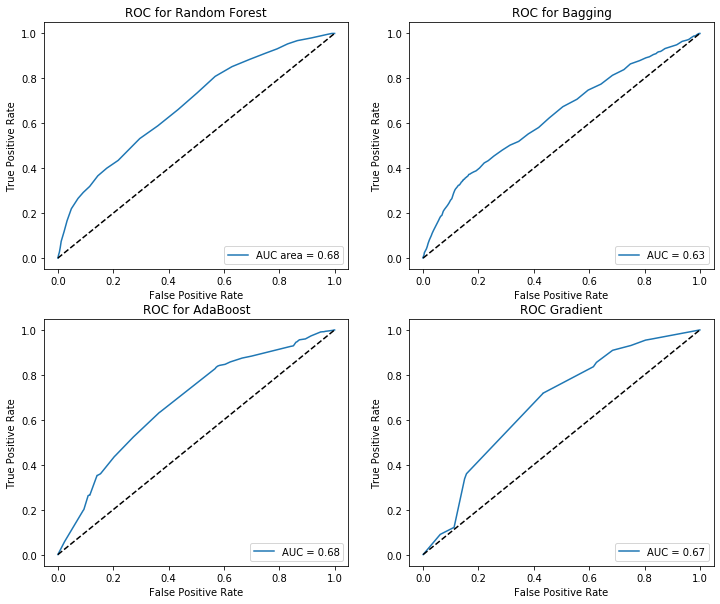

In [48]:
#Plot the ROC curve 
plt.clf()
fig, ax= plt.subplots(nrows = 2, ncols = 2, figsize = (12,10))
ax[0,0].plot(fpr, tpr, label='AUC area = %0.2f' % auc1)
ax[0,0].plot([0, 1], [0, 1], 'k--')
ax[0,0].set_xlabel('False Positive Rate')
ax[0,0].set_ylabel('True Positive Rate')
ax[0,0].set_title('ROC for Random Forest')
ax[0,0].legend(loc="lower right")

ax[0,1].plot(fpr1, tpr1, label='AUC = %0.2f' % auc2)
ax[0,1].plot([0, 1], [0, 1], 'k--')
ax[0,1].set_xlabel('False Positive Rate')
ax[0,1].set_ylabel('True Positive Rate')
ax[0,1].set_title('ROC for Bagging')
ax[0,1].legend(loc="lower right")

ax[1,0].plot(fpr2, tpr2, label='AUC = %0.2f' % auc3)
ax[1,0].plot([0, 1], [0, 1], 'k--')
ax[1,0].set_xlabel('False Positive Rate')
ax[1,0].set_ylabel('True Positive Rate')
ax[1,0].set_title('ROC for AdaBoost')
ax[1,0].legend(loc="lower right")

ax[1,1].plot(fpr3, tpr3, label='AUC = %0.2f' % auc4)
ax[1,1].plot([0, 1], [0, 1], 'k--')
ax[1,1].set_xlabel('False Positive Rate')
ax[1,1].set_ylabel('True Positive Rate')
ax[1,1].set_title('ROC Gradient')
ax[1,1].legend(loc="lower right")


plt.show()



#### Comparining different models

In [49]:
df_compare = pd.DataFrame([[lr_training,lr_testing,lr_precision,lr_f1,lr_auc],[dt_training,dt_testing,dt_precision,dt_f1,dt_auc],
                          [rf_training,rf_testing,rf_precision,rf_f1,auc1],[bg_training,bg_testing,bg_precision,bg_f1,auc2],
                          [ada_training,ada_testing,ada_precision,ada_f1,auc3],[gbc_training,gbc_testing,gbc_precision,gbc_f1,auc4]],
    columns=['Training Accuracy','Testing Accuracy','Precision Score','F1Score','AUC'],
                       index=['Logistic Regression','DecisionTrees',
                              'RandomForest','BaggingClassifier','AdaBoost','GradientBoosting'])
df_compare

,Training Accuracy,Testing Accuracy,Precision Score,F1Score,AUC
Logistic Regression,0.892476,0.894428,0.659524,0.288241,0.599111
DecisionTrees,0.892343,0.895354,0.672170,0.295950,0.500000
RandomForest,0.999041,0.893425,0.606702,0.332528,0.680449
BaggingClassifier,0.891847,0.892422,0.700000,0.213318,0.632096
AdaBoost,0.893203,0.892962,0.684887,0.234970,0.677392
GradientBoosting,0.893369,0.893348,0.743902,0.209382,0.673036


#### Key Observations

* As the dataset highly baised most of the algorithm are having training accuracy in range of (88-89.9)%.
* All of the models are not trained equally to both set of classes(majority is class 0 as not accepting the term deposit). So     the models are performing well for class 0 ie not accepting the loan and not able to perform well on the positive class ie       class 1.This is the main reason for inferior precison as well as F1 scores.
* Trianing accuracy of the models are somehow large than testing accuracy.

#### Some more observations

* We cannot compare the models on the basis of high Accuracy,Presion or Recall score as it is a highly biased dataset.
* Other metrics that can be used for comparision are - F1 Score , AUC .
* Also according to the given context/ objective of the project it can be say that reducing the values of False Positve should     be given more importance.So it can also be one of the factors for comparision. 


In [50]:
# Top 3 models with Highest testing accuracy are - 
df_compare.sort_values(ascending=False,by=['Testing Accuracy'])['Testing Accuracy'].head(3)

DecisionTrees          0.895354
Logistic Regression    0.894428
RandomForest           0.893425
Name: Testing Accuracy, dtype: float64

In [51]:
# Top 3 models with highest F1 Score are 
df_compare.sort_values(ascending=False,by=['F1Score'])['F1Score'].head(3)

RandomForest           0.332528
DecisionTrees          0.295950
Logistic Regression    0.288241
Name: F1Score, dtype: float64

In [52]:
# Top 3 Models with highest AUC score
df_compare.sort_values(ascending=False,by=['AUC'])['AUC'].head(3)

RandomForest        0.680449
AdaBoost            0.677392
GradientBoosting    0.673036
Name: AUC, dtype: float64

In [53]:
# Confusion Matrix of the models sorted according to False Postive scores in ascending order

print("Gradient Boost Classifier\n",confusion_matrix(y_test, gbc_pred))
print("Bagging Classifier \n",confusion_matrix(y_test, bg_pred))
print("AdaBoost Classifier\n",confusion_matrix(y_test, ada_pred))
print("Decision Tree Classifier \n",confusion_matrix(y_test, dt_pred))
print("Random Forest Classifier \n",confusion_matrix(y_test, rf_pred))
print("Logistic Regression \n",confusion_matrix(y_test, lr_pred))


Gradient Boost Classifier
 [[11393    63]
 [ 1319   183]]
Bagging Classifier 
 [[11375    81]
 [ 1313   189]]
AdaBoost Classifier
 [[11358    98]
 [ 1289   213]]
Decision Tree Classifier 
 [[11317   139]
 [ 1217   285]]
Random Forest Classifier 
 [[11233   223]
 [ 1158   344]]
Logistic Regression 
 [[11313   143]
 [ 1225   277]]


#### Conclusion

* We cannot commnent on any one of the models as performing best than others ones, depending on the metrics such as 
  F1 Score  Random Forest has highest score, if we consider the AUC for comparision then GradientBoost & AdaBoost has             highest AUC value. GradientBoost also has less number of False positive compare to other models.
* We can conclude that ensembles models are performing better than the single classification models.
* We can improve the accuracy of the models if we can somehow balance the dataset using sampling techniques such as upsampling     and downsampling.